In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.linear_model import LinearRegression
import pyreadr

#load data
df = pd.read_csv('./data/derived/ambiguity/fraction_ambiguous_nucleotides_combined.csv')
df_50 = pd.read_csv('./data/derived/ambiguity/fraction_ambiguous_nucleotides_50percent.csv')
df_80 = pd.read_csv('./data/derived/ambiguity/fraction_ambiguous_nucleotides_80percent.csv')
genes = pd.read_csv('./data/derived/ambiguity/ambiguity_genes.csv')
botswana = pyreadr.read_r('./data/raw/BW_tshedimoso_TSI_inclpangeaID.RDS')[None]

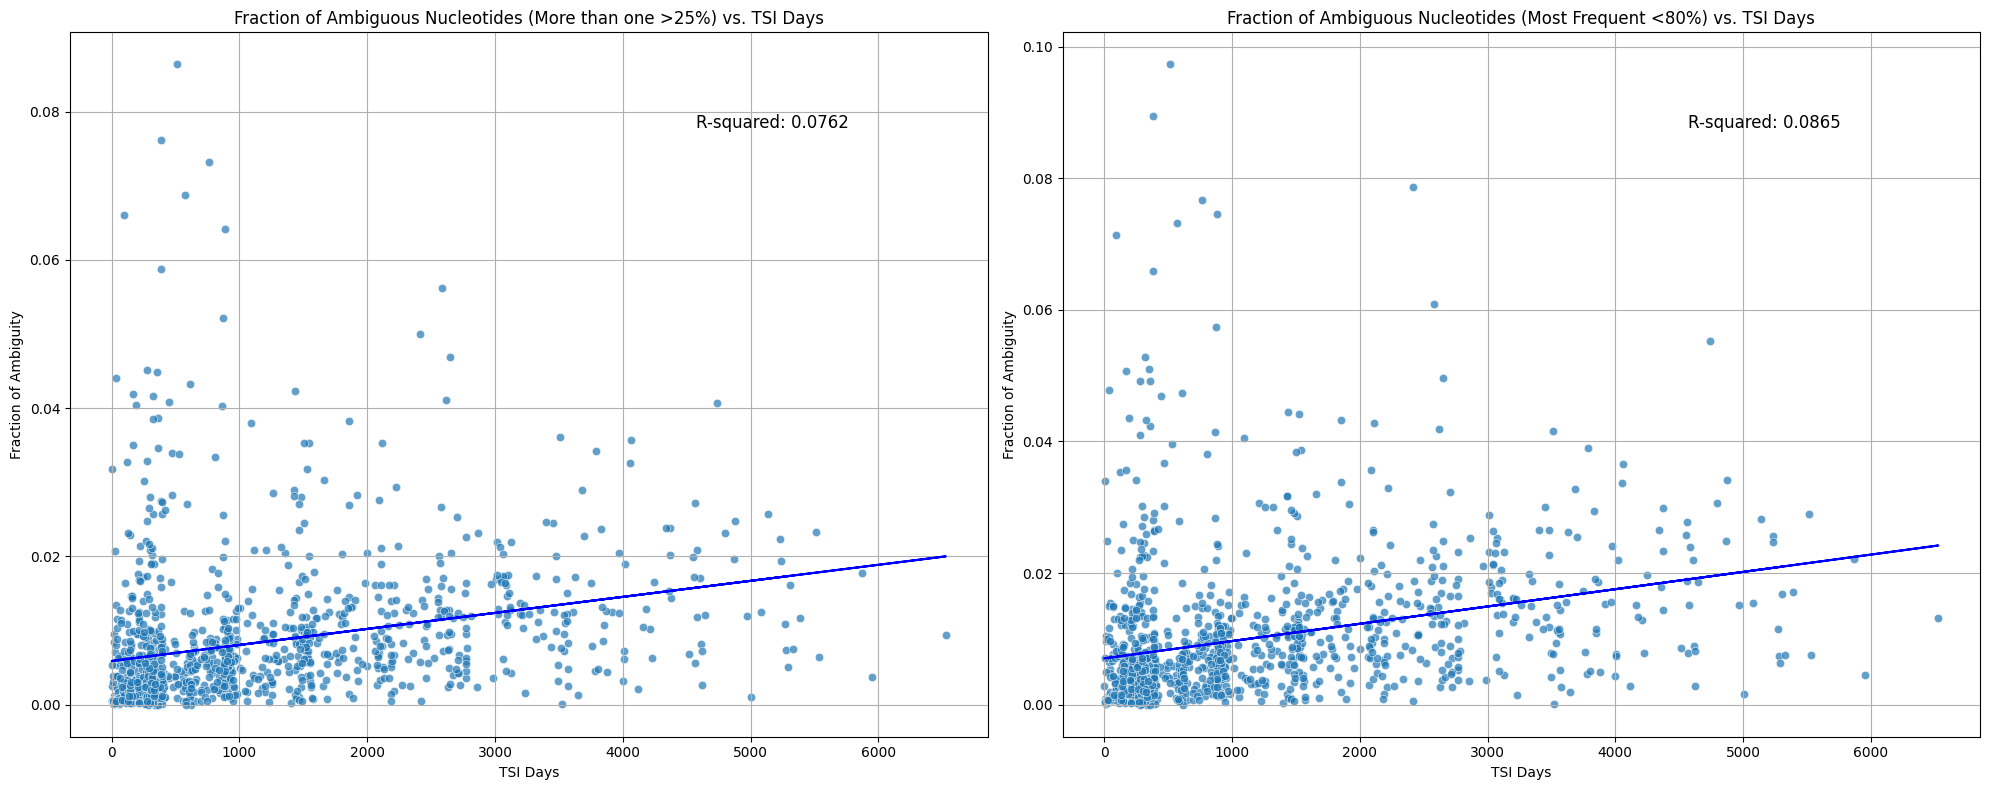

In [49]:
fig, axes = plt.subplots(1, 2, figsize=(20, 8))

# Plot for df
sns.scatterplot(ax=axes[0], x='TSI_days', y='Fraction_Ambiguous', data=df, alpha=0.7)
X = df['TSI_days'].values.reshape(-1, 1)
y = df['Fraction_Ambiguous'].values
model = LinearRegression().fit(X, y)
y_pred = model.predict(X)
axes[0].plot(df['TSI_days'], y_pred, color='blue')
r_squared = model.score(X, y)
axes[0].text(max(df['TSI_days']) * 0.7, max(df['Fraction_Ambiguous']) * 0.9,
             f'R-squared: {r_squared:.4f}', fontsize=12, color='black')
axes[0].set_title('Fraction of Ambiguous Nucleotides (More than one >25%) vs. TSI Days')
axes[0].set_xlabel('TSI Days')
axes[0].set_ylabel('Fraction of Ambiguity')
axes[0].grid(True)

# Plot for df_50
sns.scatterplot(ax=axes[1], x='TSI_days', y='Fraction_Ambiguous', data=df_80, alpha=0.7)
X = df_80['TSI_days'].values.reshape(-1, 1)
y = df_80['Fraction_Ambiguous'].values
model = LinearRegression().fit(X, y)
y_pred = model.predict(X)
axes[1].plot(df_80['TSI_days'], y_pred, color='blue')
r_squared = model.score(X, y)
axes[1].text(max(df_80['TSI_days']) * 0.7, max(df_80['Fraction_Ambiguous']) * 0.9,
             f'R-squared: {r_squared:.4f}', fontsize=12, color='black')
axes[1].set_title('Fraction of Ambiguous Nucleotides (Most Frequent <80%) vs. TSI Days')
axes[1].set_xlabel('TSI Days')
axes[1].set_ylabel('Fraction of Ambiguity')
axes[1].grid(True)

# Show the plots
plt.tight_layout()
plt.show()

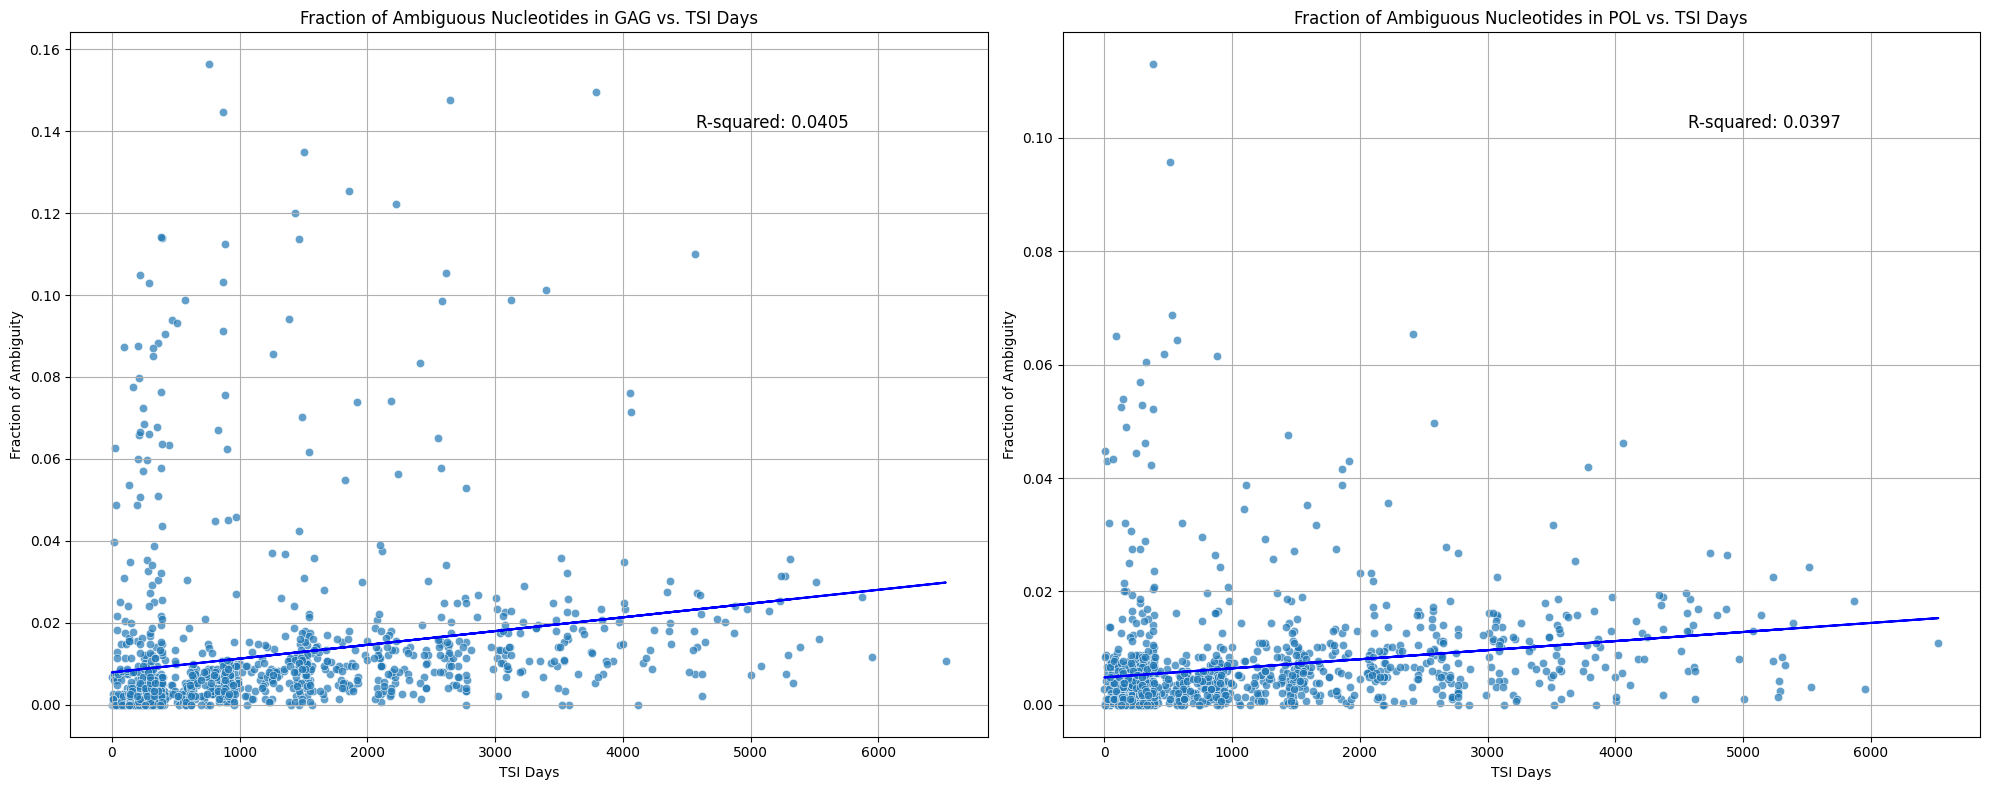

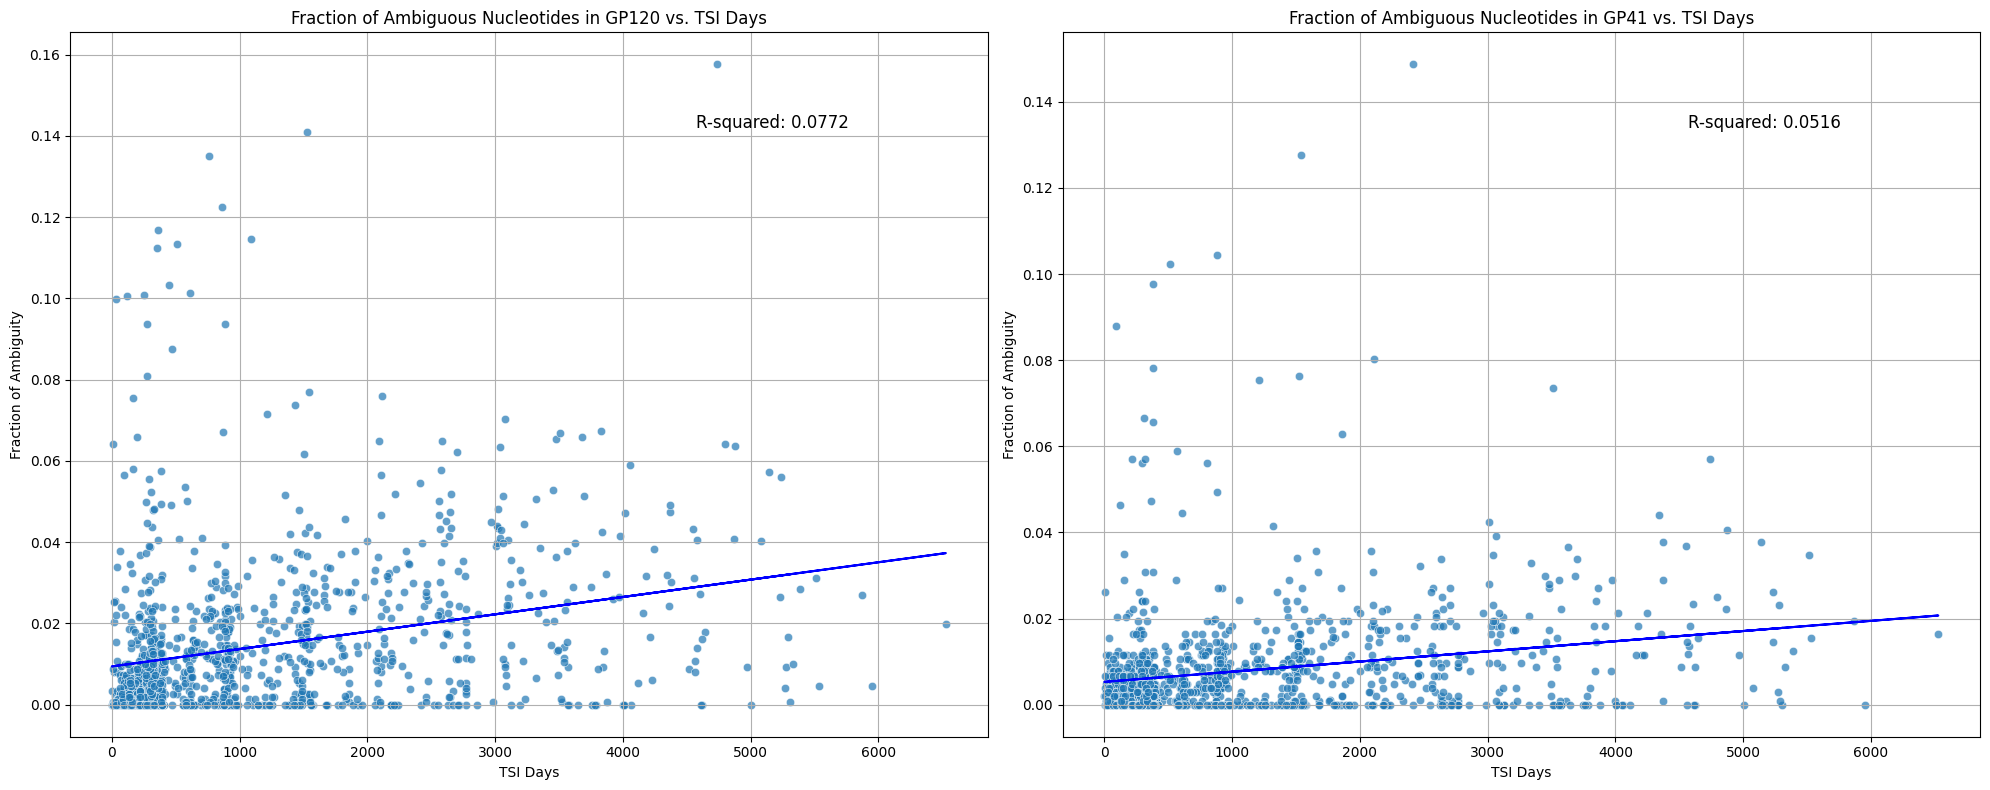

In [9]:
fig, axes = plt.subplots(1, 2, figsize=(20, 8))

# Plot for df
sns.scatterplot(ax=axes[0], x='TSI_days', y='gag_ambig', data=genes, alpha=0.7)
X = genes['TSI_days'].values.reshape(-1, 1)
y = genes['gag_ambig'].values
model = LinearRegression().fit(X, y)
y_pred = model.predict(X)
axes[0].plot(genes['TSI_days'], y_pred, color='blue')
r_squared = model.score(X, y)
axes[0].text(max(genes['TSI_days']) * 0.7, max(genes['gag_ambig']) * 0.9,
             f'R-squared: {r_squared:.4f}', fontsize=12, color='black')
axes[0].set_title('Fraction of Ambiguous Nucleotides in GAG vs. TSI Days')
axes[0].set_xlabel('TSI Days')
axes[0].set_ylabel('Fraction of Ambiguity')
axes[0].grid(True)

# Plot for df_50
sns.scatterplot(ax=axes[1], x='TSI_days', y='pol_ambig', data=genes, alpha=0.7)
X = genes['TSI_days'].values.reshape(-1, 1)
y = genes['pol_ambig'].values
model = LinearRegression().fit(X, y)
y_pred = model.predict(X)
axes[1].plot(genes['TSI_days'], y_pred, color='blue')
r_squared = model.score(X, y)
axes[1].text(max(genes['TSI_days']) * 0.7, max(genes['pol_ambig']) * 0.9,
             f'R-squared: {r_squared:.4f}', fontsize=12, color='black')
axes[1].set_title('Fraction of Ambiguous Nucleotides in POL vs. TSI Days')
axes[1].set_xlabel('TSI Days')
axes[1].set_ylabel('Fraction of Ambiguity')
axes[1].grid(True)

# Show the plots
plt.tight_layout()
plt.show()

fig, axes = plt.subplots(1, 2, figsize=(20, 8))

# Plot for df
sns.scatterplot(ax=axes[0], x='TSI_days', y='gp120_ambig', data=genes, alpha=0.7)
X = genes['TSI_days'].values.reshape(-1, 1)
y = genes['gp120_ambig'].values
model = LinearRegression().fit(X, y)
y_pred = model.predict(X)
axes[0].plot(genes['TSI_days'], y_pred, color='blue')
r_squared = model.score(X, y)
axes[0].text(max(genes['TSI_days']) * 0.7, max(genes['gp120_ambig']) * 0.9,
             f'R-squared: {r_squared:.4f}', fontsize=12, color='black')
axes[0].set_title('Fraction of Ambiguous Nucleotides in GP120 vs. TSI Days')
axes[0].set_xlabel('TSI Days')
axes[0].set_ylabel('Fraction of Ambiguity')
axes[0].grid(True)

# Plot for df_50
sns.scatterplot(ax=axes[1], x='TSI_days', y='gp41_ambig', data=genes, alpha=0.7)
X = genes['TSI_days'].values.reshape(-1, 1)
y = genes['gp41_ambig'].values
model = LinearRegression().fit(X, y)
y_pred = model.predict(X)
axes[1].plot(genes['TSI_days'], y_pred, color='blue')
r_squared = model.score(X, y)
axes[1].text(max(genes['TSI_days']) * 0.7, max(genes['gp41_ambig']) * 0.9,
             f'R-squared: {r_squared:.4f}', fontsize=12, color='black')
axes[1].set_title('Fraction of Ambiguous Nucleotides in GP41 vs. TSI Days')
axes[1].set_xlabel('TSI Days')
axes[1].set_ylabel('Fraction of Ambiguity')
axes[1].grid(True)

# Show the plots
plt.tight_layout()
plt.show()

# DUAL INFECTION

In [54]:
df = df.merge(botswana[['RENAME_ID', 'multiple_inf']], on='RENAME_ID', how='left')
df_80 = df_80.merge(botswana[['RENAME_ID', 'multiple_inf']], on='RENAME_ID', how='left')

categories = ['Unknown', 'Mono infection', 'Multiple infection']

df['multiple_inf'] = pd.Categorical(df['multiple_inf'], categories=categories)
df['multiple_inf'] = df['multiple_inf'].fillna('Unknown')

df_80['multiple_inf'] = pd.Categorical(df_80['multiple_inf'], categories=categories)
df_80['multiple_inf'] = df_80['multiple_inf'].fillna('Unknown')


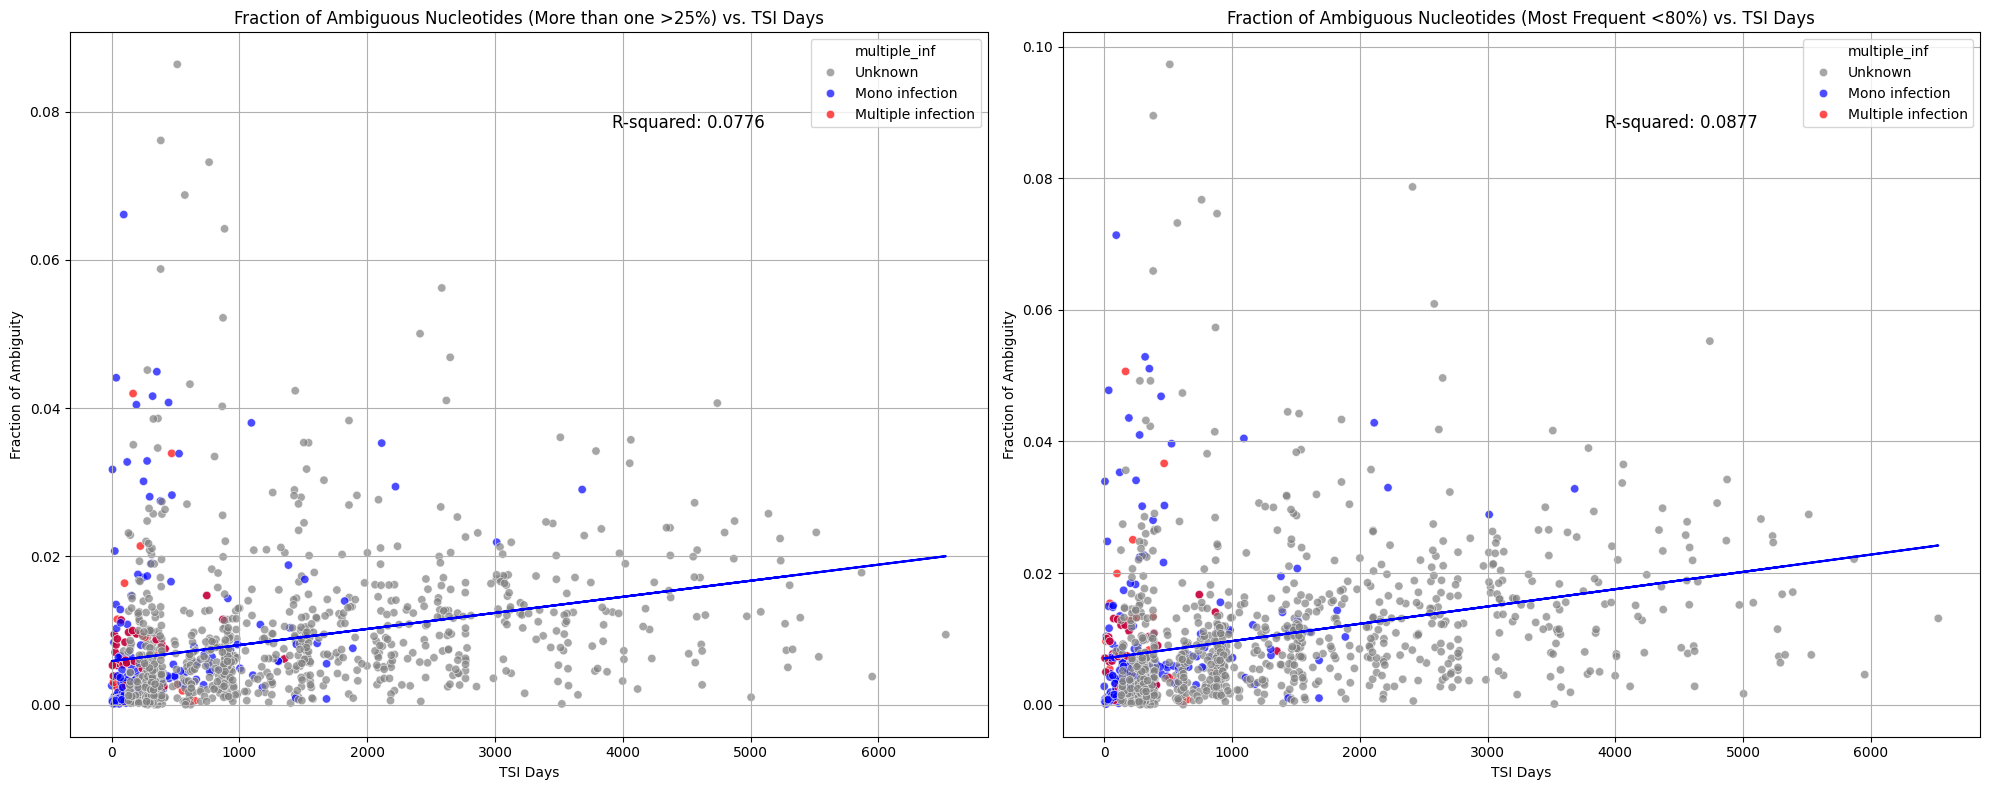

In [66]:
fig, axes = plt.subplots(1, 2, figsize=(20, 8))
hue_order = ['Unknown', 'Mono infection', 'Multiple infection']

# Plot for df
sns.scatterplot(ax=axes[0], x='TSI_days', y='Fraction_Ambiguous', data=df, hue='multiple_inf', hue_order= hue_order, palette={'Unknown': 'grey', 'Mono infection': 'blue', 'Multiple infection': 'red'}, alpha=0.7)
X = df['TSI_days'].values.reshape(-1, 1)
y = df['Fraction_Ambiguous'].values
model = LinearRegression().fit(X, y)
y_pred = model.predict(X)
axes[0].plot(df['TSI_days'], y_pred, color='blue')
r_squared = model.score(X, y)
axes[0].text(max(df['TSI_days']) * 0.6, max(df['Fraction_Ambiguous']) * 0.9,
             f'R-squared: {r_squared:.4f}', fontsize=12, color='black')
axes[0].set_title('Fraction of Ambiguous Nucleotides (More than one >25%) vs. TSI Days')
axes[0].set_xlabel('TSI Days')
axes[0].set_ylabel('Fraction of Ambiguity')
axes[0].grid(True)

# Plot for df_80
sns.scatterplot(ax=axes[1], x='TSI_days', y='Fraction_Ambiguous', data=df_80, hue='multiple_inf', hue_order = hue_order, palette={'Unknown': 'grey', 'Mono infection': 'blue', 'Multiple infection': 'red'}, alpha=0.7)
X = df_80['TSI_days'].values.reshape(-1, 1)
y = df_80['Fraction_Ambiguous'].values
model = LinearRegression().fit(X, y)
y_pred = model.predict(X)
axes[1].plot(df_80['TSI_days'], y_pred, color='blue')
r_squared = model.score(X, y)
axes[1].text(max(df_80['TSI_days']) * 0.6, max(df_80['Fraction_Ambiguous']) * 0.9,
             f'R-squared: {r_squared:.4f}', fontsize=12, color='black')
axes[1].set_title('Fraction of Ambiguous Nucleotides (Most Frequent <80%) vs. TSI Days')
axes[1].set_xlabel('TSI Days')
axes[1].set_ylabel('Fraction of Ambiguity')
axes[1].grid(True)

# Show the plots
plt.tight_layout()
plt.show()

## does multiple infection affect ambiguity?

In [61]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

df_subset = df[df['multiple_inf'].isin(['Mono infection', 'Multiple infection'])]

df_subset['multiple_inf'] = pd.Categorical(df_subset['multiple_inf'], categories=['Mono infection', 'Multiple infection'])

anova_model = ols('Fraction_Ambiguous ~ C(multiple_inf)', data=df_subset).fit()
anova_table = sm.stats.anova_lm(anova_model, typ=2)

print(anova_table)

                   sum_sq     df         F    PR(>F)
C(multiple_inf)  0.000020    1.0  0.245501  0.620616
Residual         0.025541  307.0       NaN       NaN


/var/folders/rt/3hw_n0v124vg8h2q8kwnx3180000gn/T/ipykernel_40553/3324204091.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_subset['multiple_inf'] = pd.Categorical(df_subset['multiple_inf'], categories=['Mono infection', 'Multiple infection'])


In [62]:
regression_model = ols('Fraction_Ambiguous ~ C(multiple_inf) + TSI_days', data=df_subset).fit()
print(regression_model.summary())

                            OLS Regression Results                            
Dep. Variable:     Fraction_Ambiguous   R-squared:                       0.065
Model:                            OLS   Adj. R-squared:                  0.059
Method:                 Least Squares   F-statistic:                     10.59
Date:                Wed, 10 Jul 2024   Prob (F-statistic):           3.58e-05
Time:                        18:37:42   Log-Likelihood:                 1024.2
No. Observations:                 309   AIC:                            -2042.
Df Residuals:                     306   BIC:                            -2031.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                                            coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------

## BOX PLOTS

In [35]:
intervals = [
    df['TSI_days'] <= 180.0,
    (df['TSI_days'] > 180.0) & (df['TSI_days'] <= 365.0),
    (df['TSI_days'] > 365.0) & (df['TSI_days'] <= 730.0),
    (df['TSI_days'] > 730) & (df['TSI_days'] <= 1460),
    df['TSI_days'] > 1460.0
]

intervals_80 = [
    df_80['TSI_days'] <= 180.0,
    (df_80['TSI_days'] > 180.0) & (df_80['TSI_days'] <= 365.0),
    (df_80['TSI_days'] > 365.0) & (df_80['TSI_days'] <= 730.0),
    (df_80['TSI_days'] > 730) & (df_80['TSI_days'] <= 1460),
    df_80['TSI_days'] > 1460.0
]

categories = ['0m-6m', '6m-12m', '12m-24m', '2y-4y', '4y+']
df['TSI_category'] = np.select(intervals, categories, default=np.nan)
df['TSI_category'] = pd.Categorical(df['TSI_category'], categories=categories, ordered=True)

df_80['TSI_category'] = np.select(intervals_80, categories, default=np.nan)
df_80['TSI_category'] = pd.Categorical(df_80['TSI_category'], categories=categories, ordered=True)

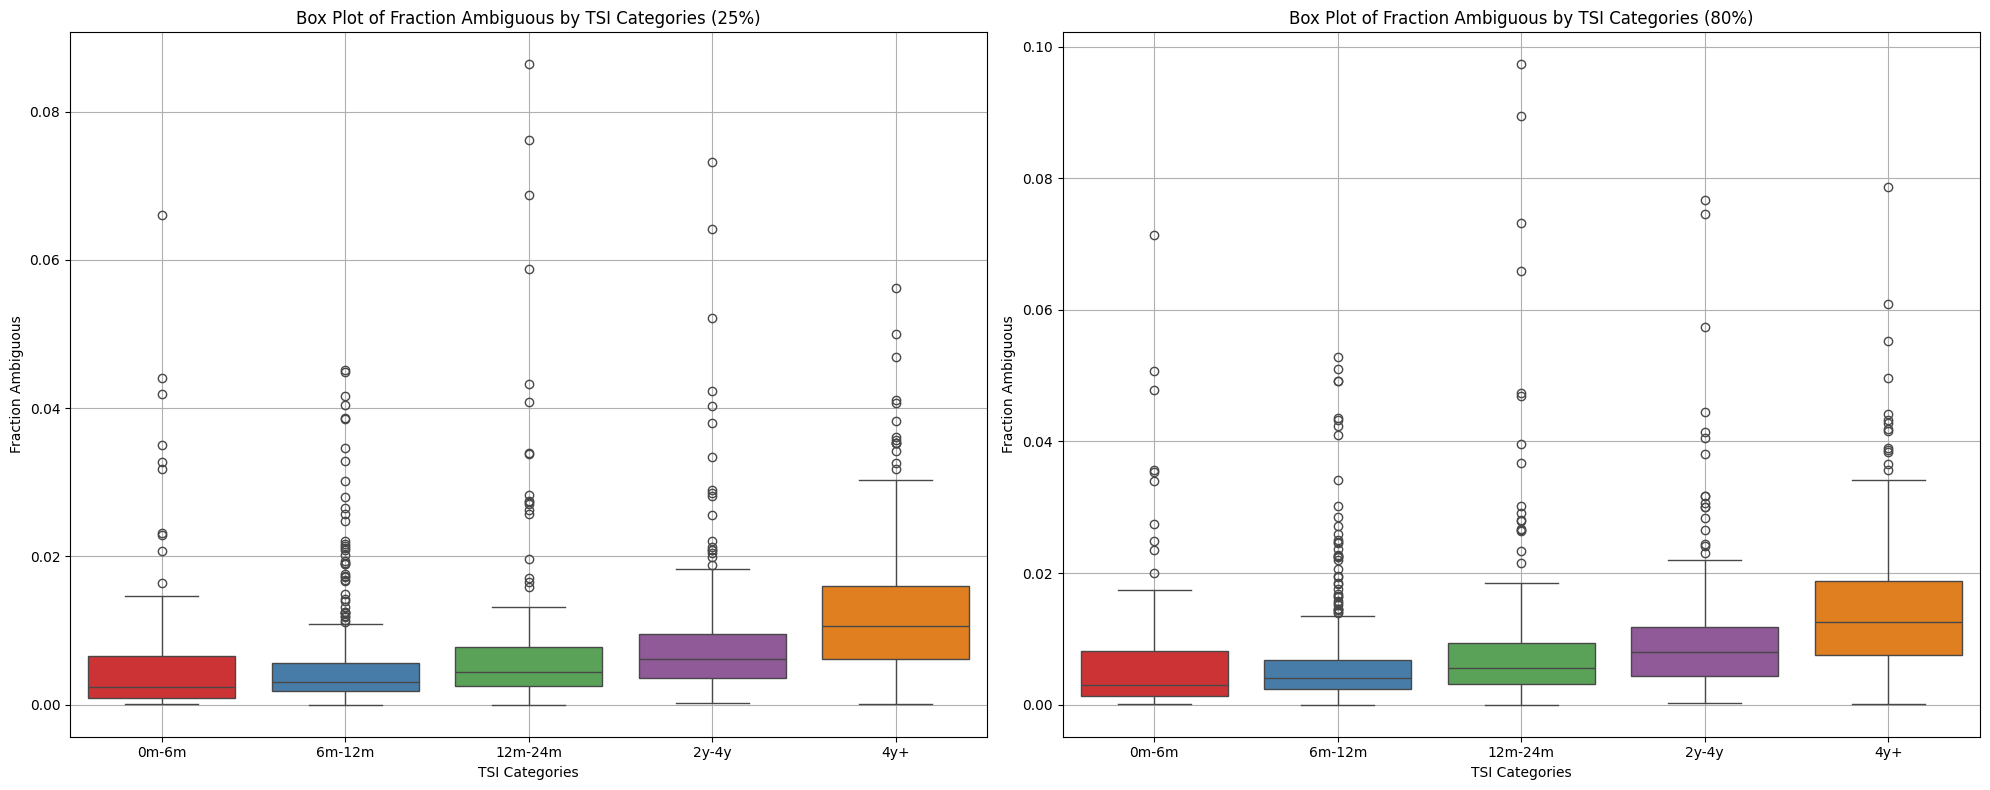

In [39]:
fig, axes = plt.subplots(1, 2, figsize=(20, 8))

# Box plot for df
sns.boxplot(ax=axes[0], x='TSI_category', y='Fraction_Ambiguous', data=df, hue = 'TSI_category', palette='Set1')
axes[0].set_title('Box Plot of Fraction Ambiguous by TSI Categories (25%)')
axes[0].set_xlabel('TSI Categories')
axes[0].set_ylabel('Fraction Ambiguous')
axes[0].grid(True)

# Box plot for df_50
sns.boxplot(ax=axes[1], x='TSI_category', y='Fraction_Ambiguous', data=df_80, hue = 'TSI_category', palette='Set1')
axes[1].set_title('Box Plot of Fraction Ambiguous by TSI Categories (80%)')
axes[1].set_xlabel('TSI Categories')
axes[1].set_ylabel('Fraction Ambiguous')
axes[1].grid(True)

# Show the plots
plt.tight_layout()
plt.show()

In [37]:
from statsmodels.formula.api import ols
import statsmodels.api as sm
from src.post_hoc import apply_tukey, plot_tukey

anova_model = ols('Fraction_Ambiguous ~ C(TSI_category)', data=df).fit() 
anova_table = sm.stats.anova_lm(anova_model, typ=2)

anova_model_50 = ols('Fraction_Ambiguous ~ C(TSI_category)', data=df_80).fit() 
anova_table_50 = sm.stats.anova_lm(anova_model_50, typ=2)

tukey_results = apply_tukey(feature= 'Fraction_Ambiguous', anova_table= anova_table, population = 'TSI_category', df = df)
tukey_results_50 = apply_tukey(feature= 'Fraction_Ambiguous', anova_table= anova_table_50, population = 'TSI_category', df = df_80)

/Users/andreawickman/saving_lives/src/post_hoc.py:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if anova_table['PR(>F)'][0] < 0.05:


Significant ANOVA result, proceed with post-hoc testing.
Significant ANOVA result, proceed with post-hoc testing.


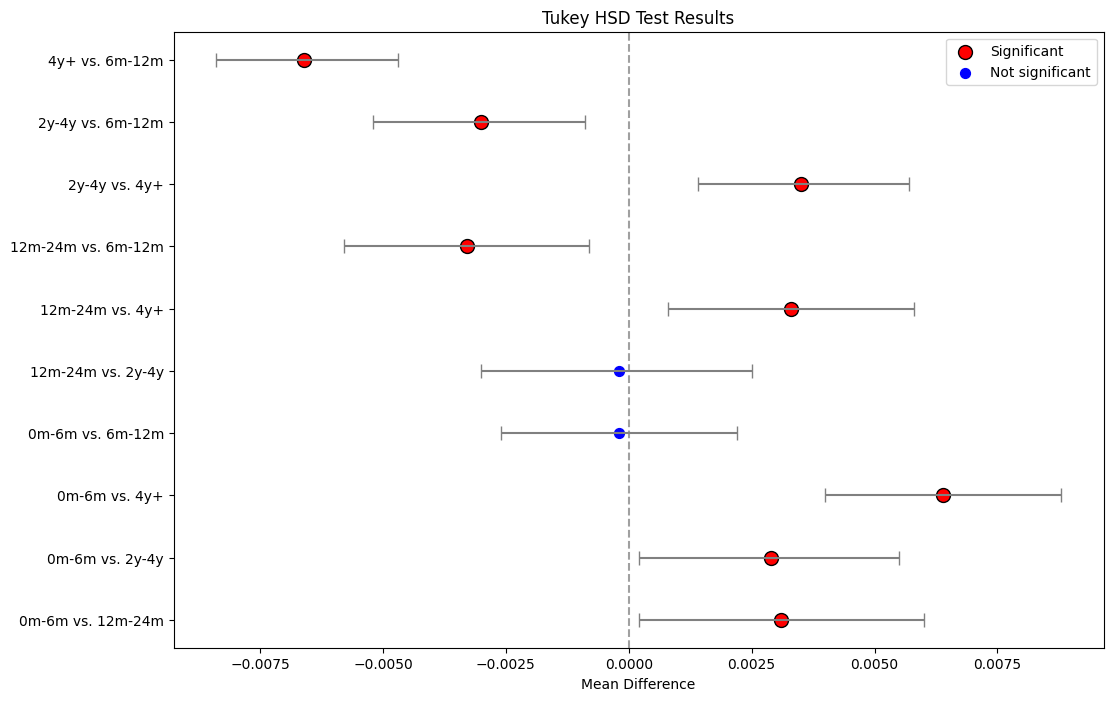

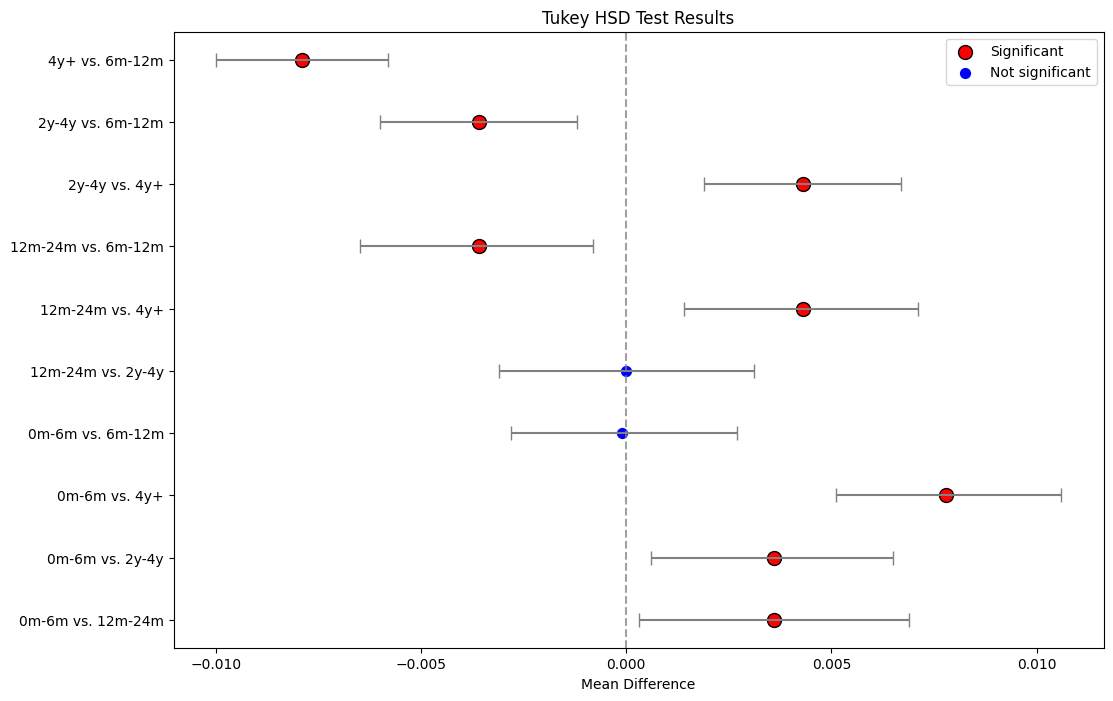

In [38]:
plot_tukey(tukey_results)
plot_tukey(tukey_results_50)

In [16]:
from scipy.stats import f_oneway
anova_results = f_oneway(
    df[df['TSI_category'] == '0m-6m']['Fraction_Ambiguous'].dropna(),
    df[df['TSI_category'] == '6m-12m']['Fraction_Ambiguous'].dropna(),
    df[df['TSI_category'] == '12m-24m']['Fraction_Ambiguous'].dropna(),
    df[df['TSI_category'] == '2y-4y']['Fraction_Ambiguous'].dropna(),
    df[df['TSI_category'] == '4y+']['Fraction_Ambiguous'].dropna()
)

print(f"ANOVA test results: F-value = {anova_results.statistic}, p-value = {anova_results.pvalue}")

ANOVA test results: F-value = 27.270387490723007, p-value = 1.0391305603070534e-21
